In [1]:
import pandas as pd
# Auxiliary classes:
from dataframeinfo import DataFrameInfo
from dataframetransform import DataFrameTransform
from datatransform import DataTransform
from plotter import Plotter

In [2]:
# Generate data frame by reading csv file generated in dbutils.
df = pd.read_csv('loan_payments_versions/loan_payments.csv', index_col='id')

Creating an instance of each auxiliary class.

In [3]:
data = DataTransform()
info = DataFrameInfo()
plotter = Plotter()
transform = DataFrameTransform()

### Formatting

By looking at the data some of the columns do not contain data in the correct format, using the DataTransform class these can be corrected. The main incorrect formats identified are:
- 'verification_status' column contains the strings 'Source Verified' and 'Verified' which have the same meaning.
- columns with dates are in string format.

In [4]:
data.replace_string_text(df, 'verification_status', 'Source ', '') # Replace the word 'source' with '' in the verification status column.
date_columns = ['issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date'] # Specifies the columns which need to convert a string to a date.
for column in date_columns:
    data.convert_string_to_date(df, column) # Applies the convert_string_to_date() method to each column in the date_columns list.

c:\Users\joels\ai_core\EDA\datatransform.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  DataFrame[column_name] = pd.to_datetime(DataFrame[column_name], errors='coerce').dt.to_period('M') # The first method converts the string in the column to a datetime.
c:\Users\joels\ai_core\EDA\datatransform.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  DataFrame[column_name] = pd.to_datetime(DataFrame[column_name], errors='coerce').dt.to_period('M') # The first method converts the string in the column to a datetime.
c:\Users\joels\ai_core\EDA\datatransform.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-e

### Null Imputation

The next thing to consider is missing and null values. The percentage of null values in columns that contain null values must be identified.

In [5]:
null_columns = info.get_null_columns(df)
for column in null_columns: # For each column that contains null values.
    print(f'{column}: {round(info.null_percentage(df, column),2)} %') # Print the column and the percentage of null values in that column rounded to 2 d.p.

funded_amount: 5.54 %
term: 8.8 %
int_rate: 9.53 %
employment_length: 3.91 %
mths_since_last_delinq: 57.17 %
mths_since_last_record: 88.6 %
last_payment_date: 0.13 %
next_payment_date: 60.13 %
last_credit_pull_date: 0.01 %
collections_12_mths_ex_med: 0.09 %
mths_since_last_major_derog: 86.17 %


It can be seen that many of the columns have an extremely high number of null values. It would be wise to drop these columns since imputing them would be inaccurate due to a majority of the data being missing and to drop rows would remove a majority of the dataset. Therefore the appropriate columns will be dropped.

In [6]:
columns_to_remove = info.identify_conditional_null_columns(df, '>', 10) # Calls method to input the columns that contain '>' '10' % null values into a list.
transform.remove_null_columns(df, columns_to_remove) # Removes all columns in the list.

member_id  loan_amount  funded_amount  funded_amount_inv       term  \
id                                                                              
38676116   41461848         8000         8000.0             8000.0  36 months   
38656203   41440010        13200        13200.0            13200.0  36 months   
38656154   41439961        16000        16000.0            16000.0  36 months   
38656128   41439934        15000        15000.0            15000.0  36 months   
38656121   41439927        15000        15000.0            15000.0  36 months   
...             ...          ...            ...                ...        ...   
76597         76583         5000         5000.0             1775.0  36 months   
142608        74724         5000         5000.0             2350.0  36 months   
117045        70978         3500         3500.0             2225.0  36 months   
88854         70699         5000         5000.0              225.0  36 months   
72323         70694         5000         5000.0              350.0  36 months   

          int_rate  instalment grade sub_grade employment_length  ...  \
id                                                                ...   
38676116      7.49      248.82     A        A4           5 years  ...   
38656203      6.99      407.52     A        A3           9 years  ...   
38656154      7.49      497.63     A        A4           8 years  ...   
38656128     14.31      514.93     C        C4            1 year  ...   
38656121      6.03      456.54     A        A1         10+ years  ...   
...            ...         ...   ...       ...               ...  ...   
76597         9.01      159.03     B        B2            1 year  ...   
142608       10.59      162.73     C        C2          < 1 year  ...   
117045        7.43      108.77     A        A2         10+ years  ...   
88854         7.43      155.38     A        A2           4 years  ...   
72323        11.54      164.98     C        C5           9 years  ...   

         total_rec_int  total_rec_late_fee recoveries collection_recovery_fee  \
id                                                                              
38676116        512.21            0.000000       0.00                    0.00   
38656203        787.94            0.000000       0.00                    0.00   
38656154        824.54            0.000000       0.00                    0.00   
38656128        947.47            0.000000       0.00                    0.00   
38656121        770.93            0.000000       0.00                    0.00   
...                ...                 ...        ...                     ...   
76597           724.82            0.000000       0.00                    0.00   
142608          826.31          104.942381       0.00                    0.00   
117045          415.37            0.000000       0.00                    0.00   
88854           174.18            0.000000       0.00                    0.00   
72323           352.34            0.000000     182.27                    1.84   

         last_payment_date last_payment_amount last_credit_pull_date  \
id                                                                     
38676116           2022-01              248.82               2022-01   
38656203           2022-01              407.52               2022-01   
38656154           2021-10            12850.16               2021-10   
38656128           2021-06            13899.67               2021-06   
38656121           2022-01              456.54               2022-01   
...                    ...                 ...                   ...   
76597              2016-07              160.61               2016-07   
142608             2016-10              490.01               2016-09   
117045             2016-09              110.58               2013-05   
88854              2014-03                0.00               2013-05   
72323              2014-03              164.97               2015-01   

          colle

Some of the columns contain less than 1 % null values, in these cases there is no need to impute values, since they make up a small subset of the data these rows can be removed.

<Axes: >

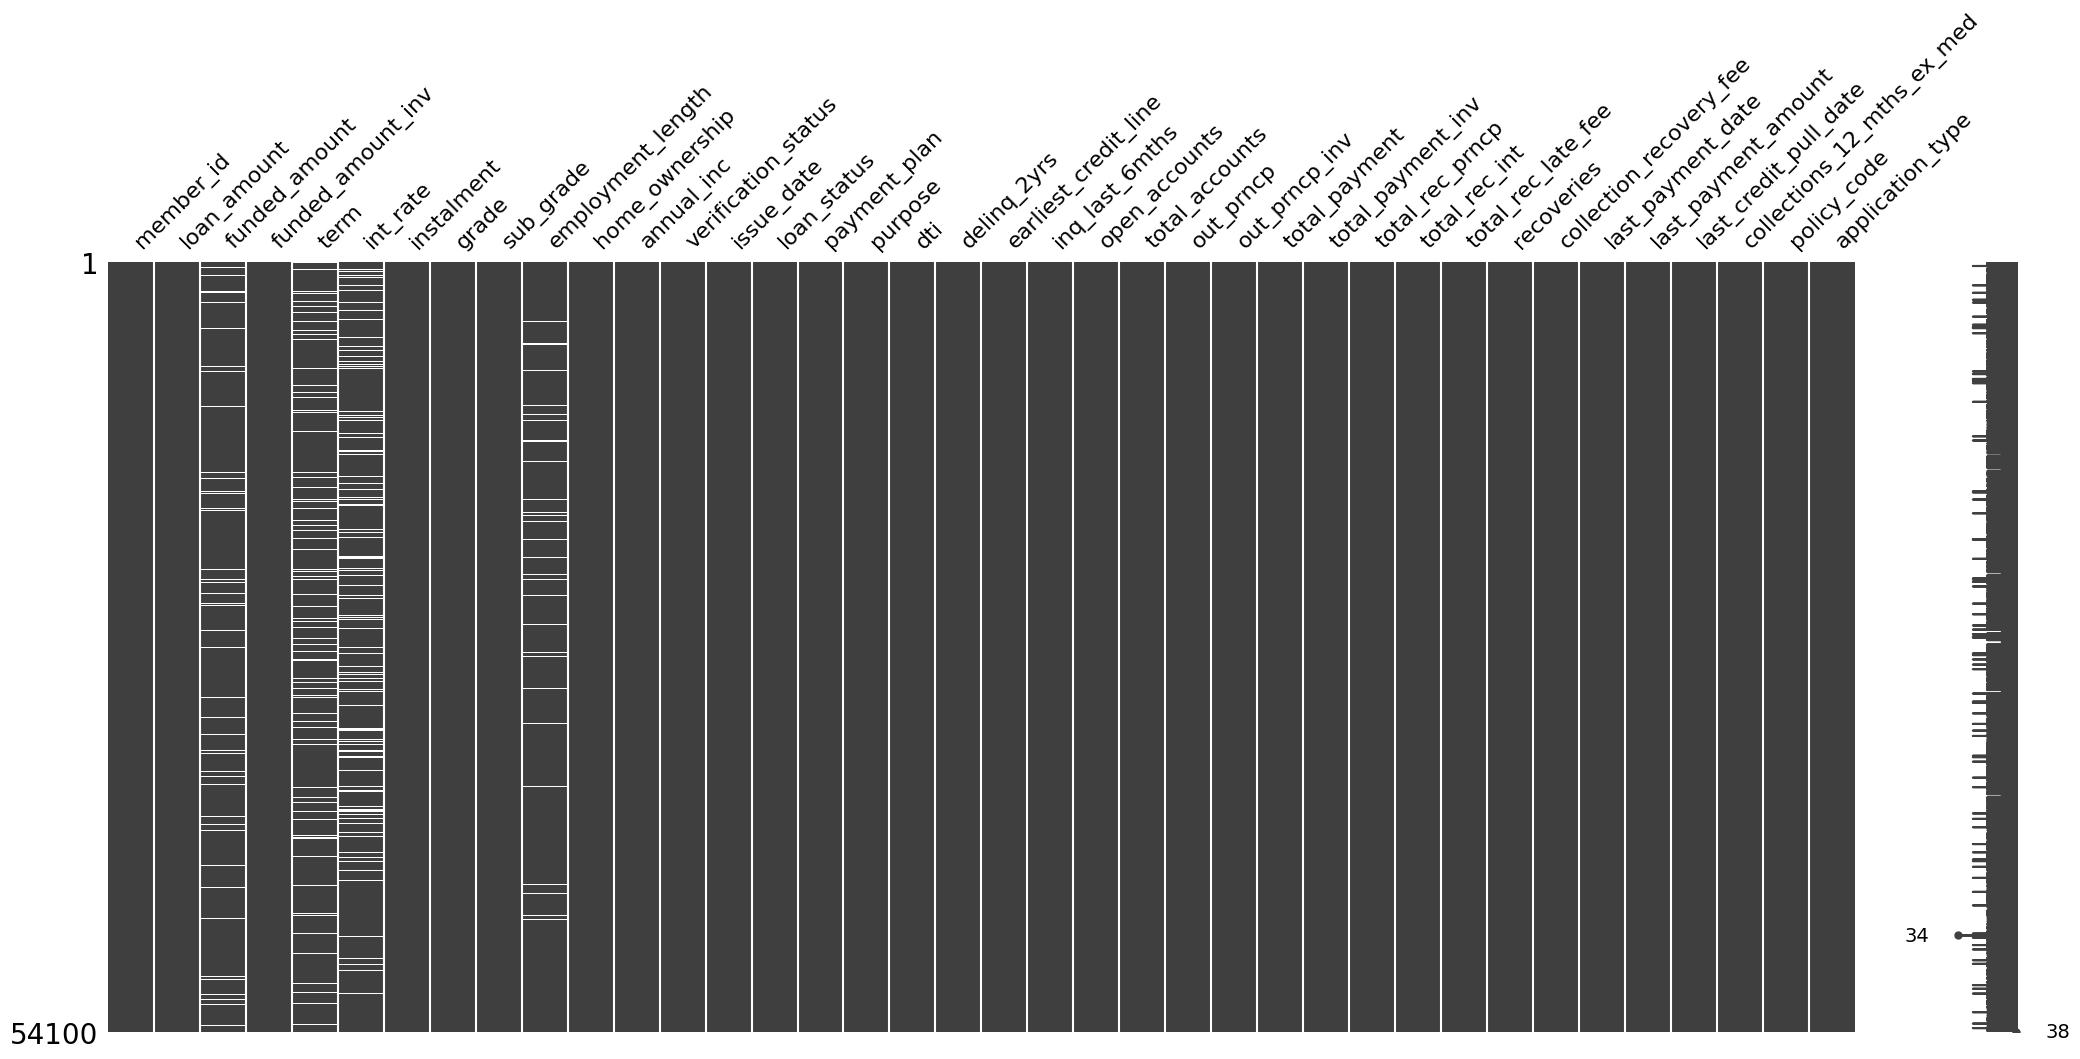

In [7]:
columns_with_rows_to_remove = info.identify_conditional_null_columns(df, '<', 1) # Calls method to input the columns that contain '<' '1' % null values into a list.
transform.remove_null_rows(df, columns_with_rows_to_remove) # Removes all rows within the list of columns that contain null values.

plotter.missing_matrix(df) # Visualise remaining missing data.

for the remaining rows the values appear to have values missing at random and should be imputed. 'funded_amount' and 'int_rate' are numeric type so a Linear Regression model could be used to try and impute the null values based on all the other columns. The distribution of the data before and after the null values are predicted should be checked to ensure the data has not been biased.

In [8]:
df = transform.linear_regression_fill(df, 'funded_amount', score=True, check_distribution=True)
df = transform.linear_regression_fill(df, 'int_rate', score=True, check_distribution=True)


(funded_amount) Initial Distribution:



c:\Users\joels\ai_core\EDA\dataframetransform.py:132: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




(funded_amount) Final Distribution:




Score: 1.0

(int_rate) Initial Distribution:



c:\Users\joels\ai_core\EDA\dataframetransform.py:132: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




(int_rate) Final Distribution:




Score: 0.94


It can be seen that the distribution shape is retained after the linear regression null imputation (although some outliers are introduced, these will be handled later). It can also be seen that the model scores are fairly accurate!

Now the 'employment_length' and 'term' columns are categorical type so a linear regression model will not be suitable. In this case a Support Vector Machine (SVM) model can be used to impute the nulls. The distribution of the data, in terms of normalised null count, before and after the model is used should be checked to avoid biasing the data.

The model is trained using variables that may be related to 'employment_length'.

In [9]:
employment_length_training_features = ['annual_inc', 'loan_amount', 'funded_amount', 'int_rate','instalment', 'grade', 'sub_grade', 'home_ownership', 'dti']
transform.support_vector_machine_fill(df, 'employment_length', training_features= employment_length_training_features, check_distribution=True)

c:\Users\joels\ai_core\EDA\dataframetransform.py:170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\joels\ai_core\EDA\dataframetransform.py:171: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Distribution: Normalised Value Count
                   Before  After
employment_length               
10+ years           0.306  0.333
2 years             0.097  0.093
< 1 year            0.096  0.093
3 years             0.088  0.085
5 years             0.074  0.071
1 year              0.071  0.068
4 years             0.067  0.064
6 years             0.059  0.056
7 years             0.057  0.055
8 years             0.049  0.047
9 years             0.037  0.036


c:\Users\joels\ai_core\EDA\dataframetransform.py:202: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



member_id  loan_amount  funded_amount  funded_amount_inv       term  \
id                                                                              
38676116   41461848         8000         8000.0            8000.00  36 months   
38656203   41440010        13200        13200.0           13200.00  36 months   
38656154   41439961        16000        16000.0           16000.00  36 months   
38656128   41439934        15000        15000.0           15000.00  36 months   
38656121   41439927        15000        15000.0           15000.00  36 months   
...             ...          ...            ...                ...        ...   
55521        107577         1000         1000.0               0.00  36 months   
185352       105254         6000         6000.0             502.69  36 months   
122637       104675         4000         4000.0            1550.00  36 months   
395632        91027         5500         5500.0            5450.00  36 months   
142608        74724         5000         5000.0            2350.00  36 months   

          int_rate  instalment grade sub_grade employment_length  ...  \
id                                                                ...   
38676116      7.49      248.82     A        A4           5 years  ...   
38656203      6.99      407.52     A        A3           9 years  ...   
38656154      7.49      497.63     A        A4           8 years  ...   
38656128     14.31      514.93     C        C4            1 year  ...   
38656121      6.03      456.54     A        A1         10+ years  ...   
...            ...         ...   ...       ...               ...  ...   
55521        16.08       35.20     F        F2          < 1 year  ...   
185352        9.64      192.60     B        B4            1 year  ...   
122637        7.75      124.89     A        A3            1 year  ...   
395632       13.16      185.74     C        C3          < 1 year  ...   
142608       10.59      162.73     C        C2          < 1 year  ...   

         total_rec_int  total_rec_late_fee recoveries collection_recovery_fee  \
id                                                                              
38676116        512.21            0.000000        0.0                     0.0   
38656203        787.94            0.000000        0.0                     0.0   
38656154        824.54            0.000000        0.0                     0.0   
38656128        947.47            0.000000        0.0                     0.0   
38656121        770.93            0.000000        0.0                     0.0   
...                ...                 ...        ...                     ...   
55521           207.77            0.000000        0.0                     0.0   
185352          933.06            0.000000        0.0                     0.0   
122637          495.79            0.000000        0.0                     0.0   
395632          303.77            0.000000        0.0                     0.0   
142608          826.31          104.942381        0.0                     0.0   

         last_payment_date last_payment_amount last_credit_pull_date  \
id                                                                     
38676116           2022-01              248.82               2022-01   
38656203           2022-01              407.52               2022-01   
38656154           2021-10            12850.16               2021-10   
38656128           2021-06            13899.67               2021-06   
38656121           2022-01              456.54               2022-01   
...                    ...                 ...                   ...   
55521              2016-03              538.97               2016-03   
185352             2016-12              193.55               2016-12   
122637             2016-09              126.29               2016-08   
395632             2016-10               85.66               2021-04   
142608             2016-10              490.01               2016-09   

          colle

It can be seen in the output of the last code that the normalised value counts of the 'employment_length' column before the model is applied are very similar to the distributions after the model is applied, indicating it is suitable. the SVM can now be applied to impute the null values of the 'term' column.

The model was trained using only a select number of columns as training features, these features were identified as being variables that could be related to the 'term' variable. Also the distributions before and after the nulls are imputed by the SVM will be checked.

In [10]:
term_training_features = ['loan_amount', 'int_rate', 'instalment', 'grade', 'employment_length', 'sub_grade', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti']
transform.support_vector_machine_fill(df, 'term', training_features= term_training_features, check_distribution=True)

c:\Users\joels\ai_core\EDA\dataframetransform.py:170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\joels\ai_core\EDA\dataframetransform.py:171: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Distribution: Normalised Value Count
           Before  After
term                    
36 months   0.724  0.749
60 months   0.276  0.251


c:\Users\joels\ai_core\EDA\dataframetransform.py:202: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



member_id  loan_amount  funded_amount  funded_amount_inv       term  \
id                                                                              
38676116   41461848         8000         8000.0            8000.00  36 months   
38656203   41440010        13200        13200.0           13200.00  36 months   
38656154   41439961        16000        16000.0           16000.00  36 months   
38656128   41439934        15000        15000.0           15000.00  36 months   
38656121   41439927        15000        15000.0           15000.00  36 months   
...             ...          ...            ...                ...        ...   
55521        107577         1000         1000.0               0.00  36 months   
185352       105254         6000         6000.0             502.69  36 months   
122637       104675         4000         4000.0            1550.00  36 months   
395632        91027         5500         5500.0            5450.00  36 months   
142608        74724         5000         5000.0            2350.00  36 months   

          int_rate  instalment grade sub_grade employment_length  ...  \
id                                                                ...   
38676116      7.49      248.82     A        A4           5 years  ...   
38656203      6.99      407.52     A        A3           9 years  ...   
38656154      7.49      497.63     A        A4           8 years  ...   
38656128     14.31      514.93     C        C4            1 year  ...   
38656121      6.03      456.54     A        A1         10+ years  ...   
...            ...         ...   ...       ...               ...  ...   
55521        16.08       35.20     F        F2          < 1 year  ...   
185352        9.64      192.60     B        B4            1 year  ...   
122637        7.75      124.89     A        A3            1 year  ...   
395632       13.16      185.74     C        C3          < 1 year  ...   
142608       10.59      162.73     C        C2          < 1 year  ...   

         total_rec_int  total_rec_late_fee recoveries collection_recovery_fee  \
id                                                                              
38676116        512.21            0.000000        0.0                     0.0   
38656203        787.94            0.000000        0.0                     0.0   
38656154        824.54            0.000000        0.0                     0.0   
38656128        947.47            0.000000        0.0                     0.0   
38656121        770.93            0.000000        0.0                     0.0   
...                ...                 ...        ...                     ...   
55521           207.77            0.000000        0.0                     0.0   
185352          933.06            0.000000        0.0                     0.0   
122637          495.79            0.000000        0.0                     0.0   
395632          303.77            0.000000        0.0                     0.0   
142608          826.31          104.942381        0.0                     0.0   

         last_payment_date last_payment_amount last_credit_pull_date  \
id                                                                     
38676116           2022-01              248.82               2022-01   
38656203           2022-01              407.52               2022-01   
38656154           2021-10            12850.16               2021-10   
38656128           2021-06            13899.67               2021-06   
38656121           2022-01              456.54               2022-01   
...                    ...                 ...                   ...   
55521              2016-03              538.97               2016-03   
185352             2016-12              193.55               2016-12   
122637             2016-09              126.29               2016-08   
395632             2016-10               85.66               2021-04   
142608             2016-10              490.01               2016-09   

          colle

The normalised value count is relatively similar indicating the model did not make unreasonable predictions. 

Now using the missing_matrix plot, it will be confirmed that all missing values have been either imputed or dropped.

<Axes: >

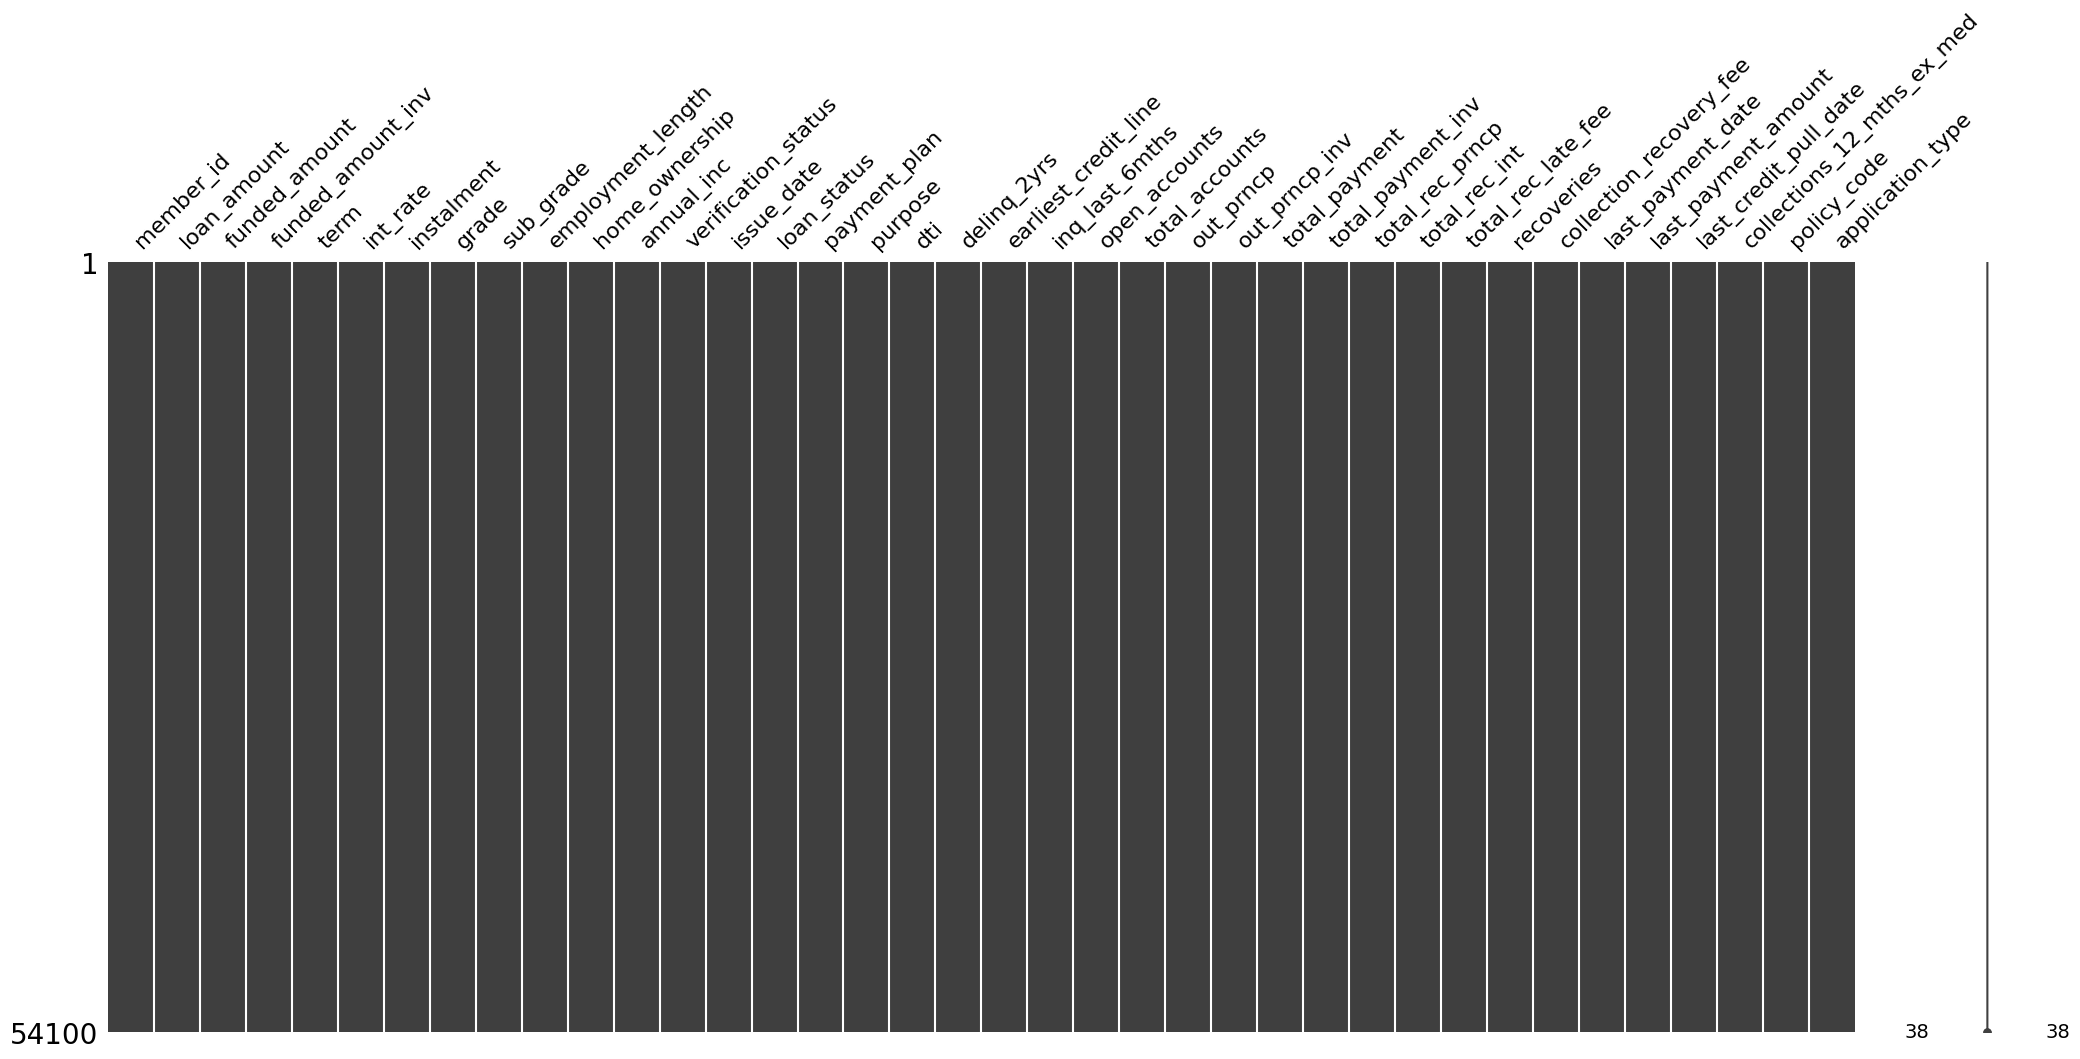

In [11]:
plotter.missing_matrix(df)

In [12]:
# Saving a copy of the df in loan_payments_versions folder
with open('loan_payments_versions/loan_payments_post_null_imputation.csv', 'w') as file:
    df.to_csv(file, encoding= 'utf-8')

The dataframe now contains no null values! 

### Skewness Correction

We can now move on to transforming skewed columns. First we need to identify which columns are skewed. The absolute value of the skewness threshold used is 0.5 since above this value the histograms and Q-Q plots of the columns show evident skewness.

member_id: 2.2
loan_amount: 0.8
funded_amount: 0.82
funded_amount_inv: 0.81
instalment: 1.0
annual_inc: 8.74
delinq_2yrs: 5.32
inq_last_6mths: 3.24
open_accounts: 1.06
total_accounts: 0.78
out_prncp: 2.35
out_prncp_inv: 2.35
total_payment: 1.27
total_payment_inv: 1.26
total_rec_prncp: 1.26
total_rec_int: 2.2
total_rec_late_fee: 13.26
recoveries: 14.38
collection_recovery_fee: 27.79
last_payment_amount: 2.5
collections_12_mths_ex_med: 20.3


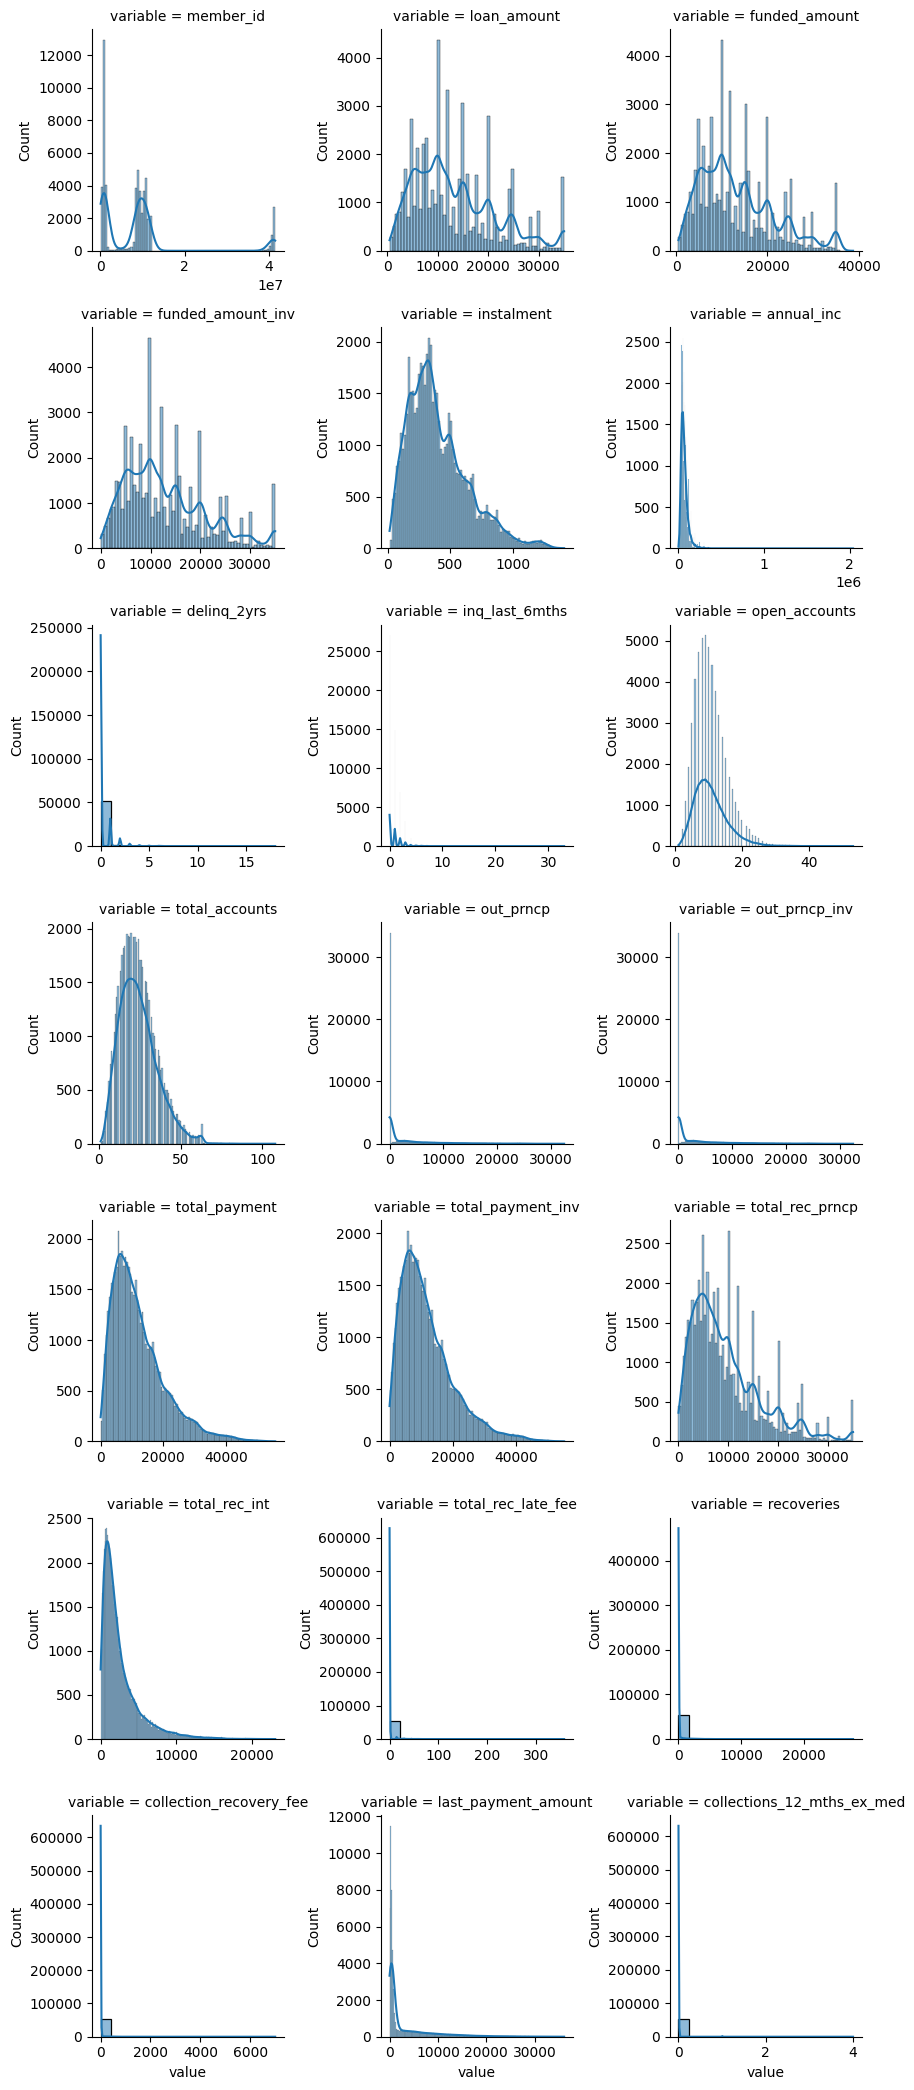

In [13]:
skewed_columns = info.get_skewed_columns(df, 0.5)
info.get_skewness(df, skewed_columns)
plotter.facet_grid_histogram(df, skewed_columns)

To determine the optimum transformation, the '.compare_skewness_transformations()' method defined in the Plotter class will be used to visualise the effect of all transformations on skewness. Which can be seen below for the specific example of 'annual_inc' which has a skewness of 8.7. This method was applied to every skewed column to identify the optimum transformation.

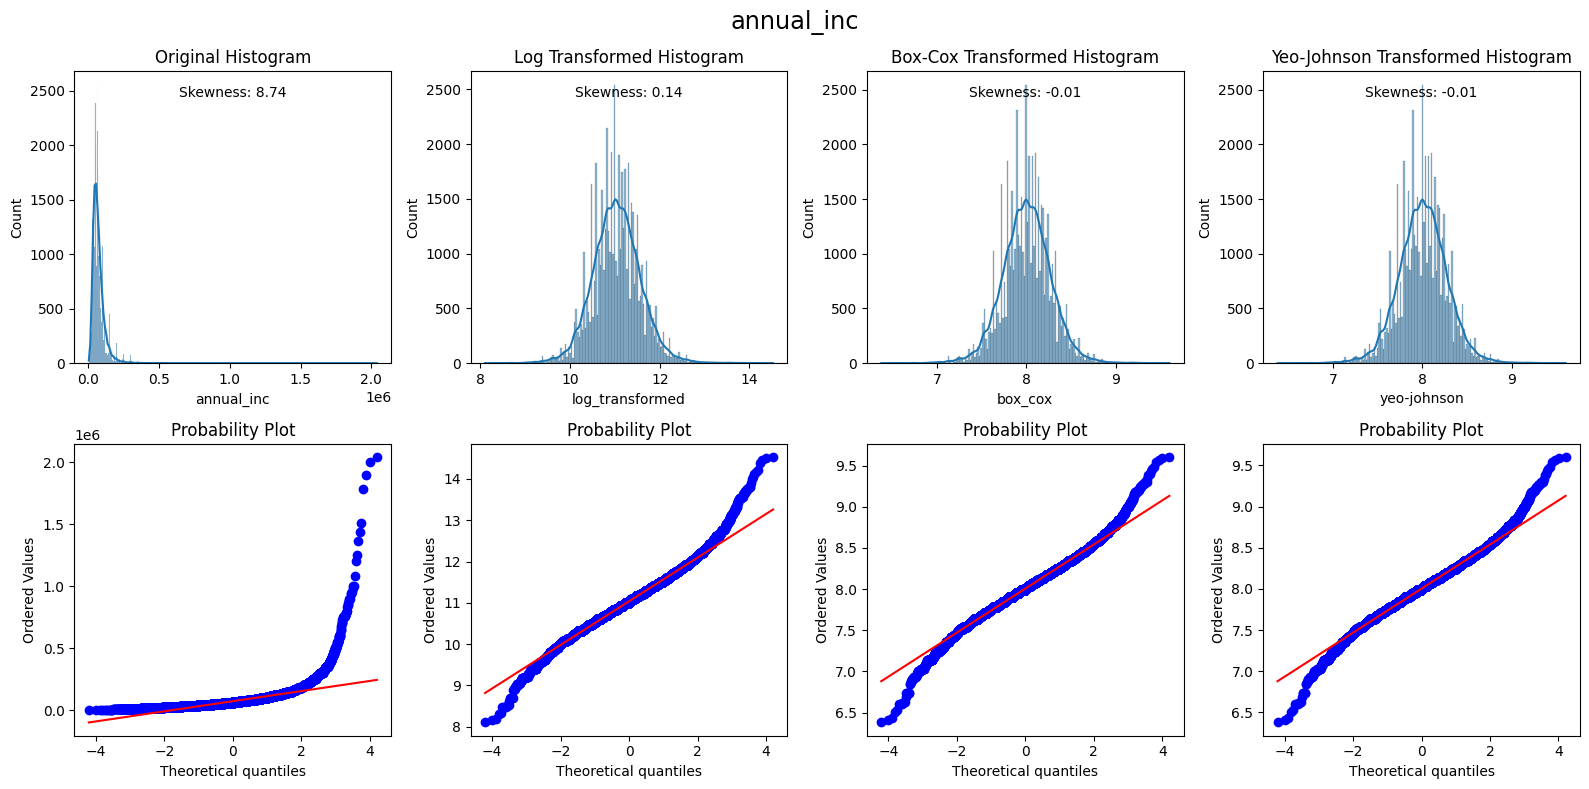

In [14]:
plotter.compare_skewness_transformations(df, 'annual_inc')

From this visualisation it can be seen that both the Box-Cox and Yeo-Johnson transformations are the optimum methods, so in this case the Box-Cox will be selected since it is simpler and more straightforward. Therefore the variable 'annual_inc' will be added to a list of variables to which the Box-Cox transformation will be applied.

This visualisation using the 'compare_skewness_transformations()' method for each skewed column can be found in the 'skewness_transformations_visualisation.ipynb' notebook. Based on the results that variable will be added to the appropriate transformation list, shown below.

In [15]:
# List of columns to be transformed by each method:
box_cox_list = ['loan_amount', 'funded_amount', 'instalment', 'annual_inc', 'total_payment', 'total_rec_int']
yeo_johnson_list = ['funded_amount_inv', 'open_accounts', 'total_accounts', 'total_payment_inv', 'total_rec_prncp', 'last_payment_amount']

It can be noted that logarithmic normalisation was not the optimum method for correcting skewness of any of the columns.

The following visualisation and value count is for the 'total_rec_late_fees' which has a skewness of 13.2, again this visualisation can be found in the 'skewness_transformations_visualisation.ipynb' notebook.

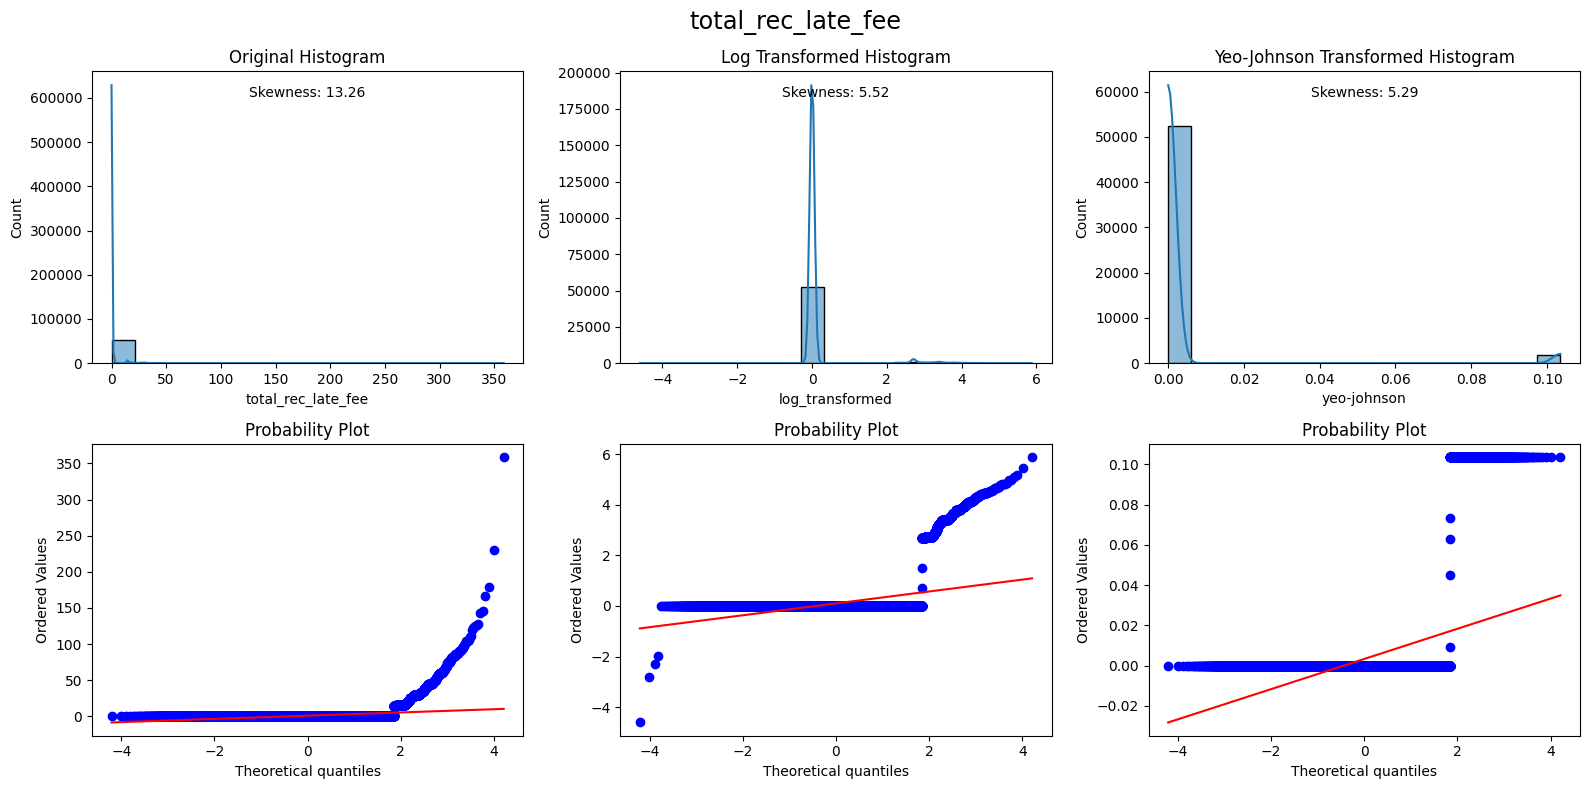

total_rec_late_fee
0.000000      0.967634
15.000000     0.004640
30.000000     0.000536
24.910000     0.000074
32.730000     0.000074
                ...   
19.962410     0.000018
38.959484     0.000018
14.923354     0.000018
0.010000      0.000018
104.942381    0.000018
Name: proportion, Length: 1429, dtype: float64

In [16]:
# Visualising skewness correction and normalised value count of 'total_rec_late_fees':
plotter.compare_skewness_transformations(df, 'total_rec_late_fee')
df['total_rec_late_fee'].value_counts(normalize=True)

As can be seen even after transformation the distribution is not normal and the skew is quite high. From the value counts it can be seen that this is because a vast majority of the data points are a single value (0). For this and columns which showed a similar pattern, it was decided no transformation would be used. These columns are:
'delinq_2yrs', 'collections_12_mths_ex_med', 'out_prncp', 'out_prncp_inv', 'recoveries', 'collection_recovery_fee', 'total_rec_late_fee' and 'inq_last_6mths'

 The respective transformation methods can now be applied to each of the columns in each list.

In [17]:
# Performing Box-Cox transformations:
for column in box_cox_list:
    df[column] = transform.box_cox_transform(df, column).values

# Performing Yeo-Johnson transformations:
for column in yeo_johnson_list:
    df[column] = transform.yeo_johnson_transform(df, column).values

The skewness correction of each transformation can be visualised in a before and after of the Q-Q plot. This has been done for the specific example of 'total_payment', as shown below, however this trend can be seen for all of the other variables that were transformed within the 'box_cox_list' and 'yeo_johnson_list' lists. (The remainder of the before and after Q-Q plots are also visible in 'skewness_transformations_visualisation.ipynb')

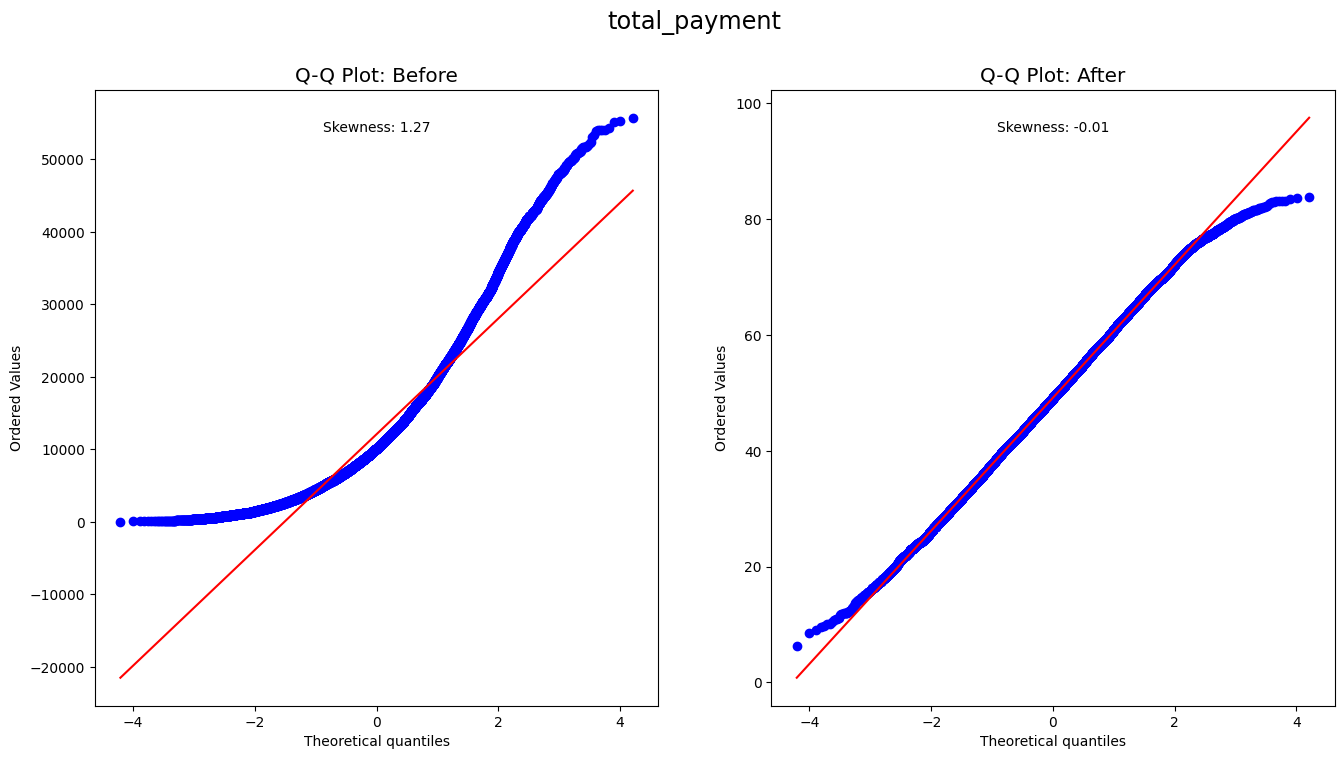

In [18]:
plotter.before_after_skewness_transformation(df, 'total_payment')

In [19]:
# Saving a copy of the df in loan_payments_versions folder
with open('loan_payments_versions/loan_payments_post_skewness_correction.csv', 'w') as file:
    df.to_csv(file, encoding= 'utf-8')

### Outlier Removal

The first step in dealing with outliers is to visualise box-plots for numerical columns to identify which columns need to be transformed to deal with outliers.

c:\Users\joels\Miniconda3\envs\EDA\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.



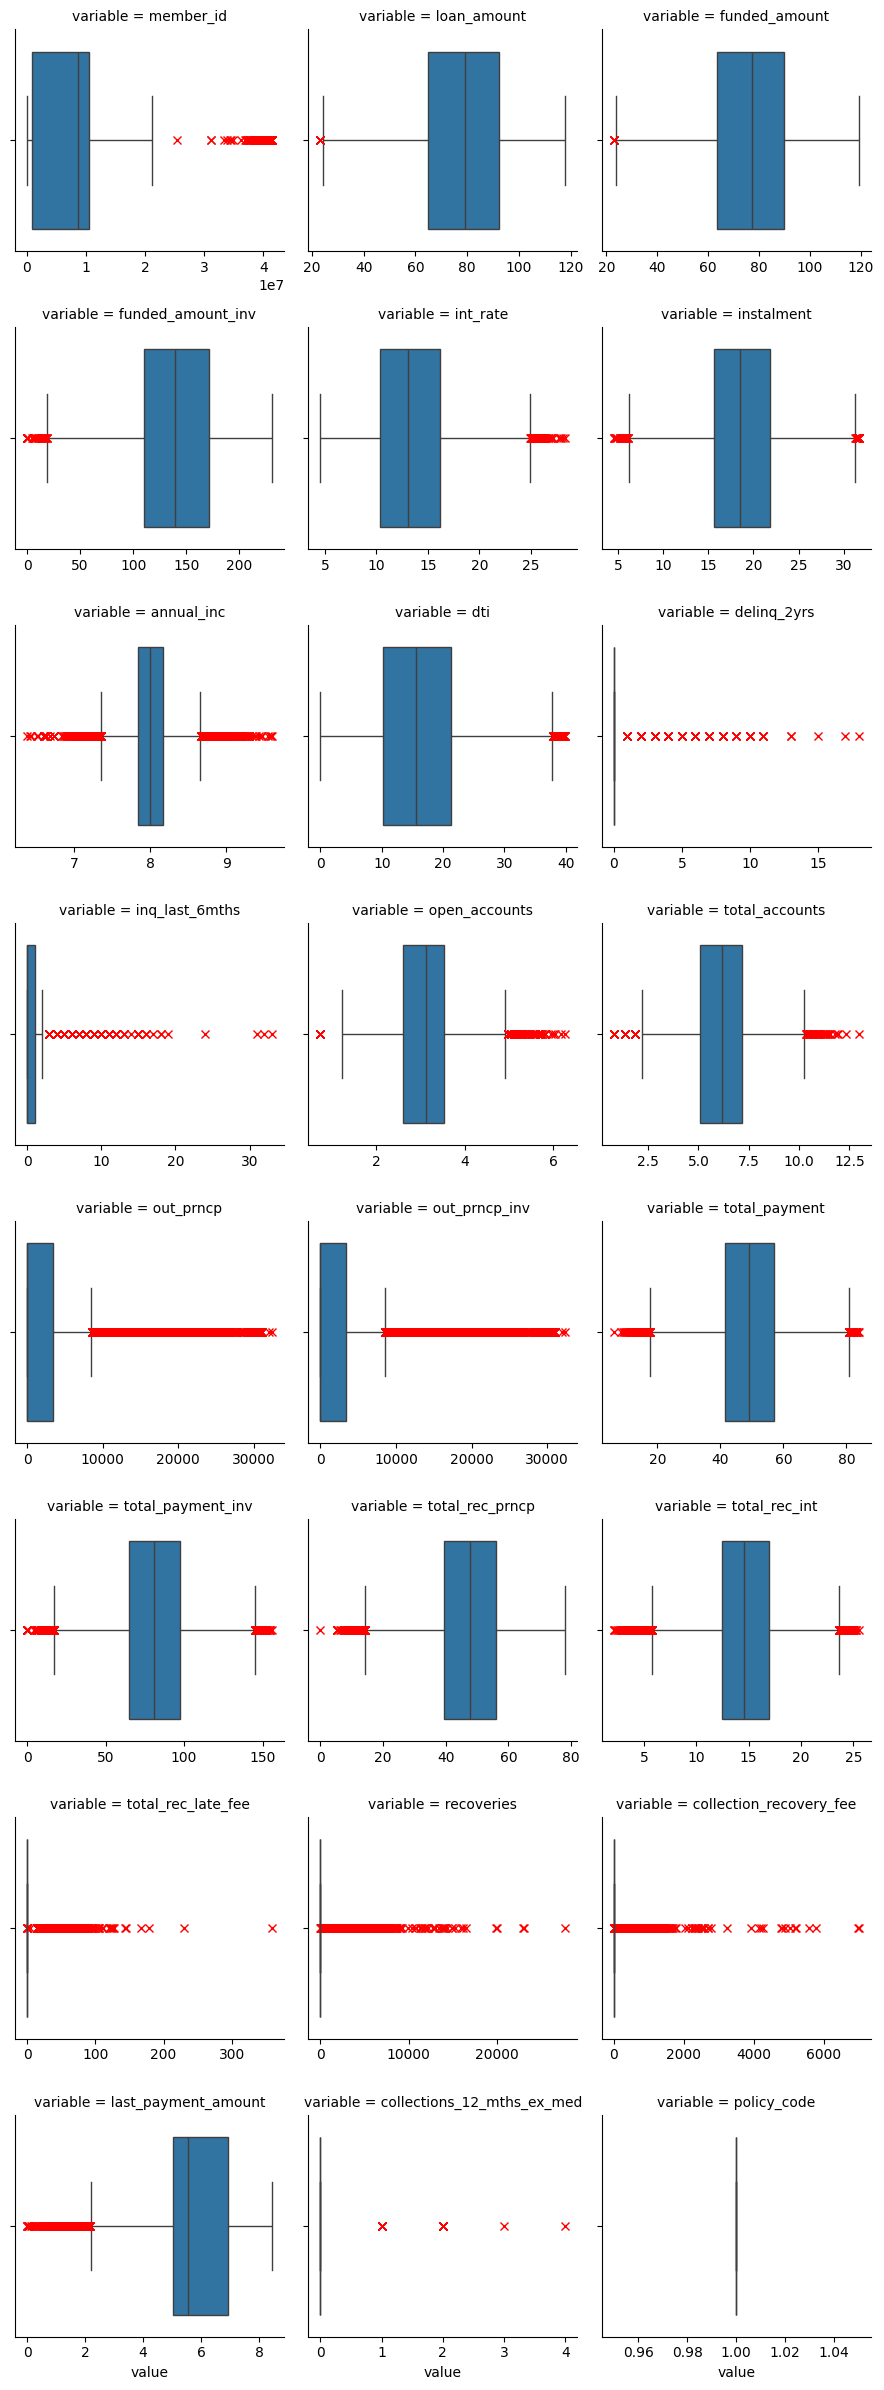

In [20]:
numeric_columns = info.get_numeric_columns(df)
plotter.facet_grid_box_plot(df, numeric_columns)

From this visualisation the outliers have been clearly identified. Some columns will be excluded from this transformation since it is evident from the plots that they do not follow a normal distribution. This includes the following variables 'delinq_2yrs', 'inq_last_6mths', 'total_rec_late_fees', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med' and 'policy_code'.

The list in the following code block is the numerical normally distributed columns for which outliers will be transformed. To determine which values in a column are outliers, any values with a z-score of greater than or equal to 3 were identified as outliers that need to be dropped.

In [21]:
# List of columns identified with outliers that need to be removed.
outlier_columns = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'open_accounts', 'total_accounts', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount']

print(f'Before: The DataFrame has {df.shape[0]} rows.') # Print the number of rows before.

for column in outlier_columns: # For each column that will have outliers removed.
    df = transform.drop_outlier_rows(df, column, 3) # Drop the rows which contain 'z score' greater than 3 for the column being iterated.
    
print(f'After: The DataFrame has {df.shape[0]} rows.') # Print the number of rows after.

Before: The DataFrame has 54100 rows.
After: The DataFrame has 52904 rows.


Now the outliers have been dealt with, the changes to the dataframe should be visualised. The following is an example visualisation for 3 variables: 'annual_inc', 'open_accounts' and 'total_rec_prncp'. To view the before and after visualisations for each transformed column, this can be found in the 'outlier_removal_visualisation.ipynb' notebook.

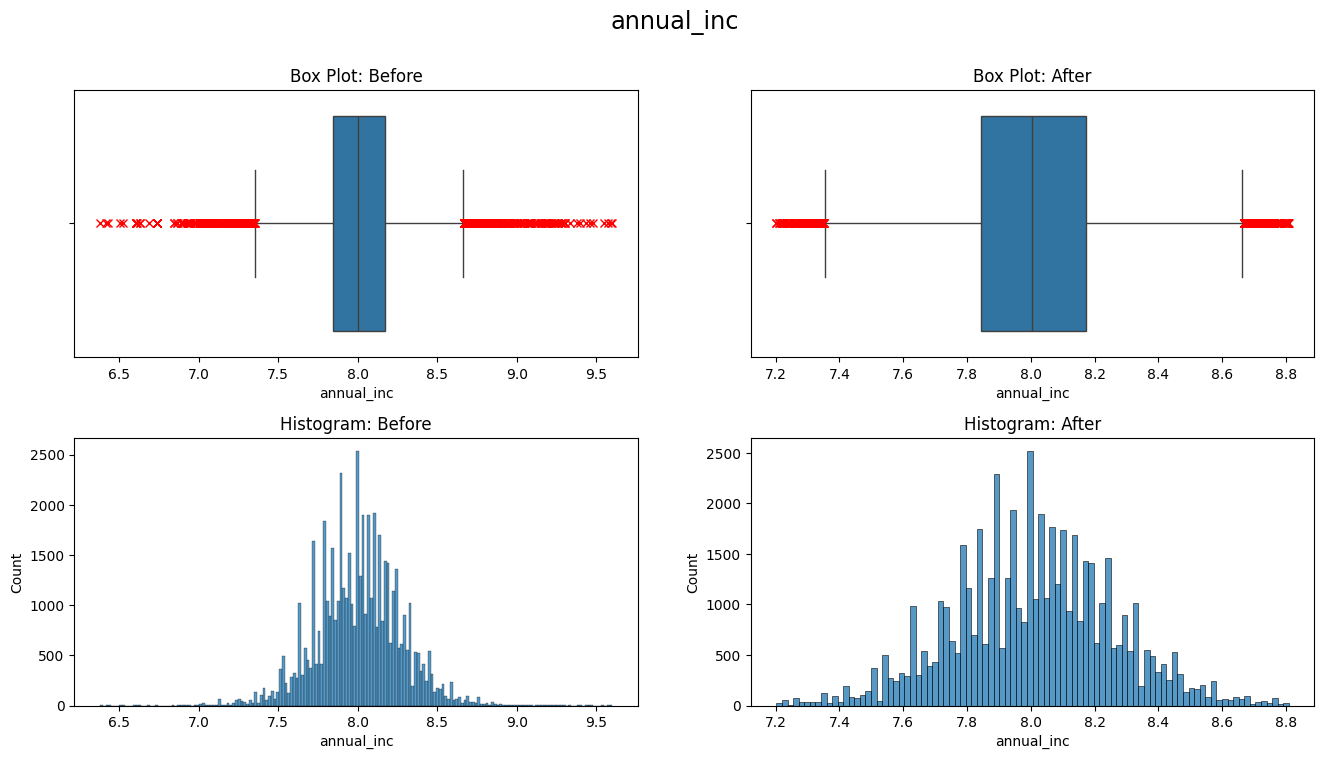

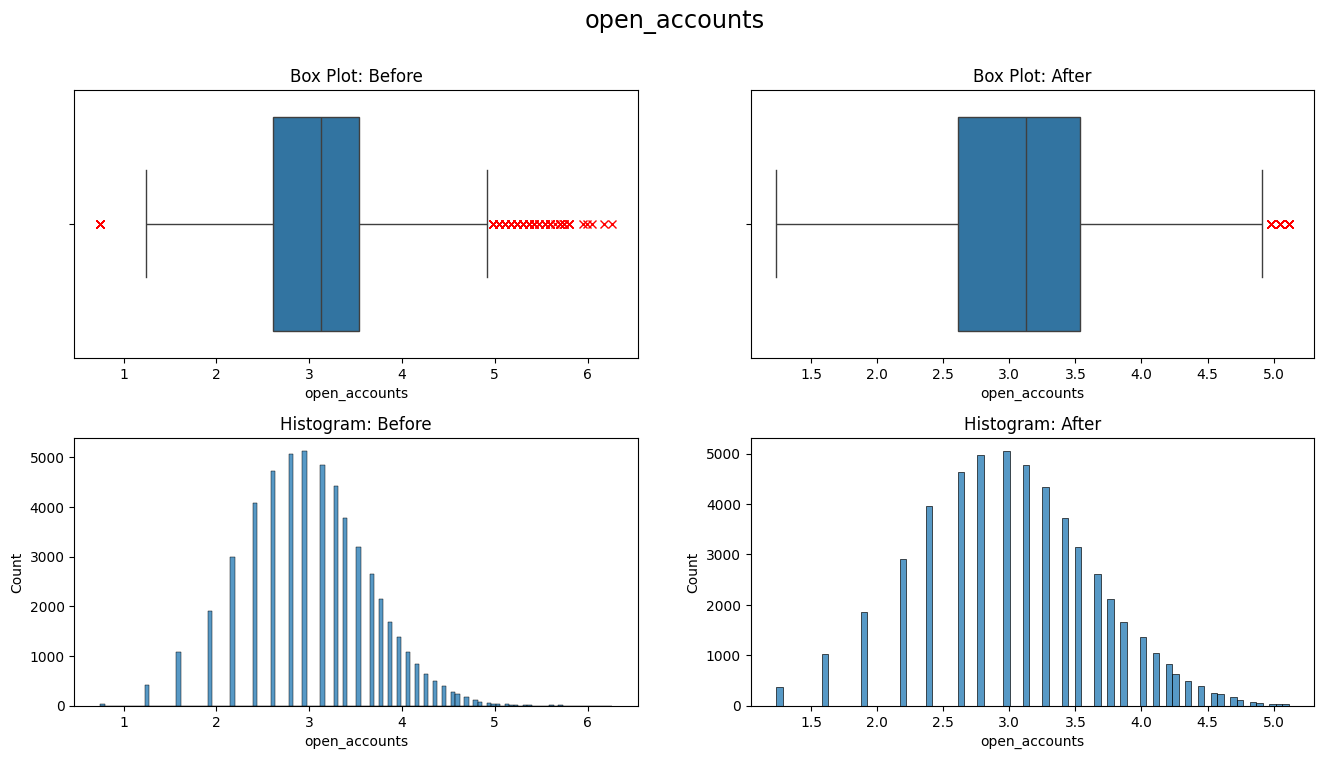

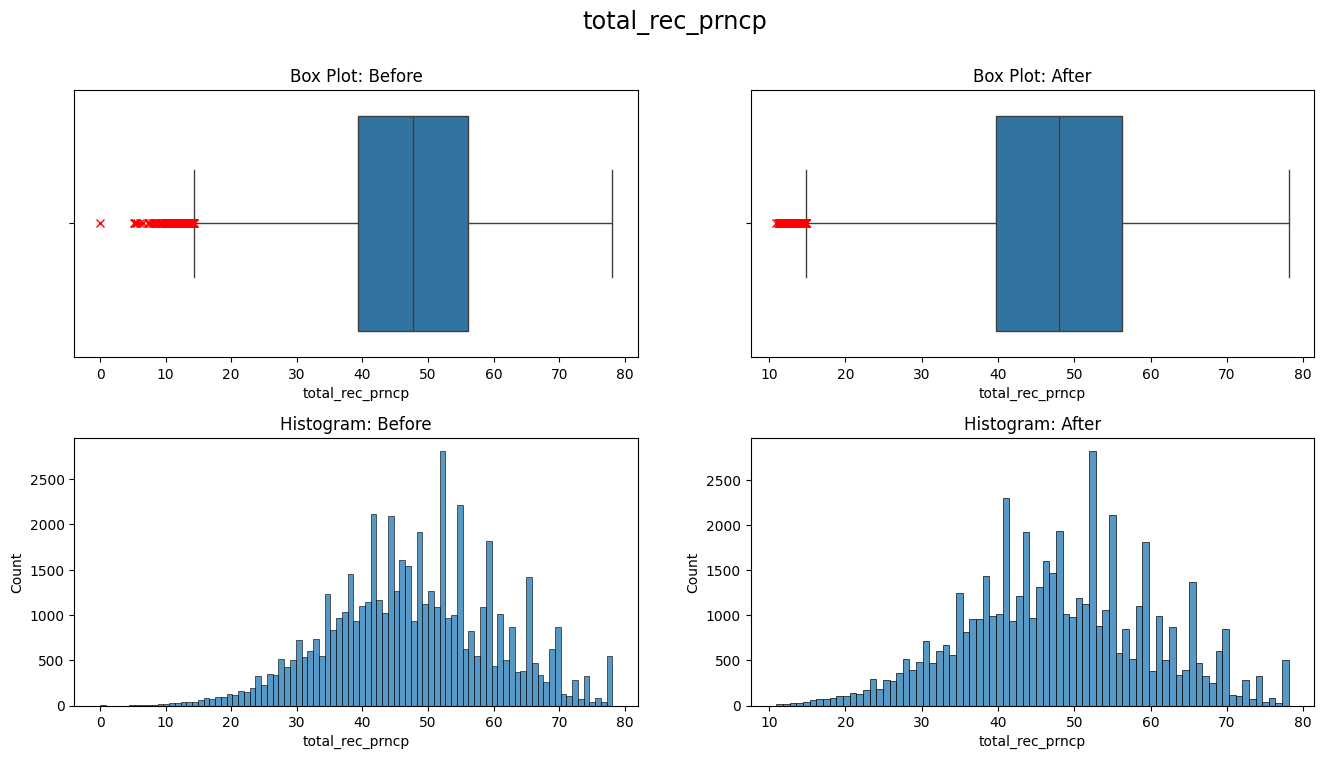

In [22]:
for column in ['annual_inc', 'open_accounts', 'total_rec_prncp']:
    plotter.before_after_outlier_removal(df, column)

The transformations for most other columns follow a similar pattern. It can be seen from the visualisations that a majority of the outliers that are clearly seperated from the rest of the data have beem removed. The histograms evidently show this, as the histograms have become more centred and outliers are no longer included. in the box-plots some fliers remain becuase they are not very seperate from the data.

### Identifying Correlation

The next step is to identify correlation between variables and drop overly correlated columns. To start with a correlation matrix will be used to visualise correlation between columns.

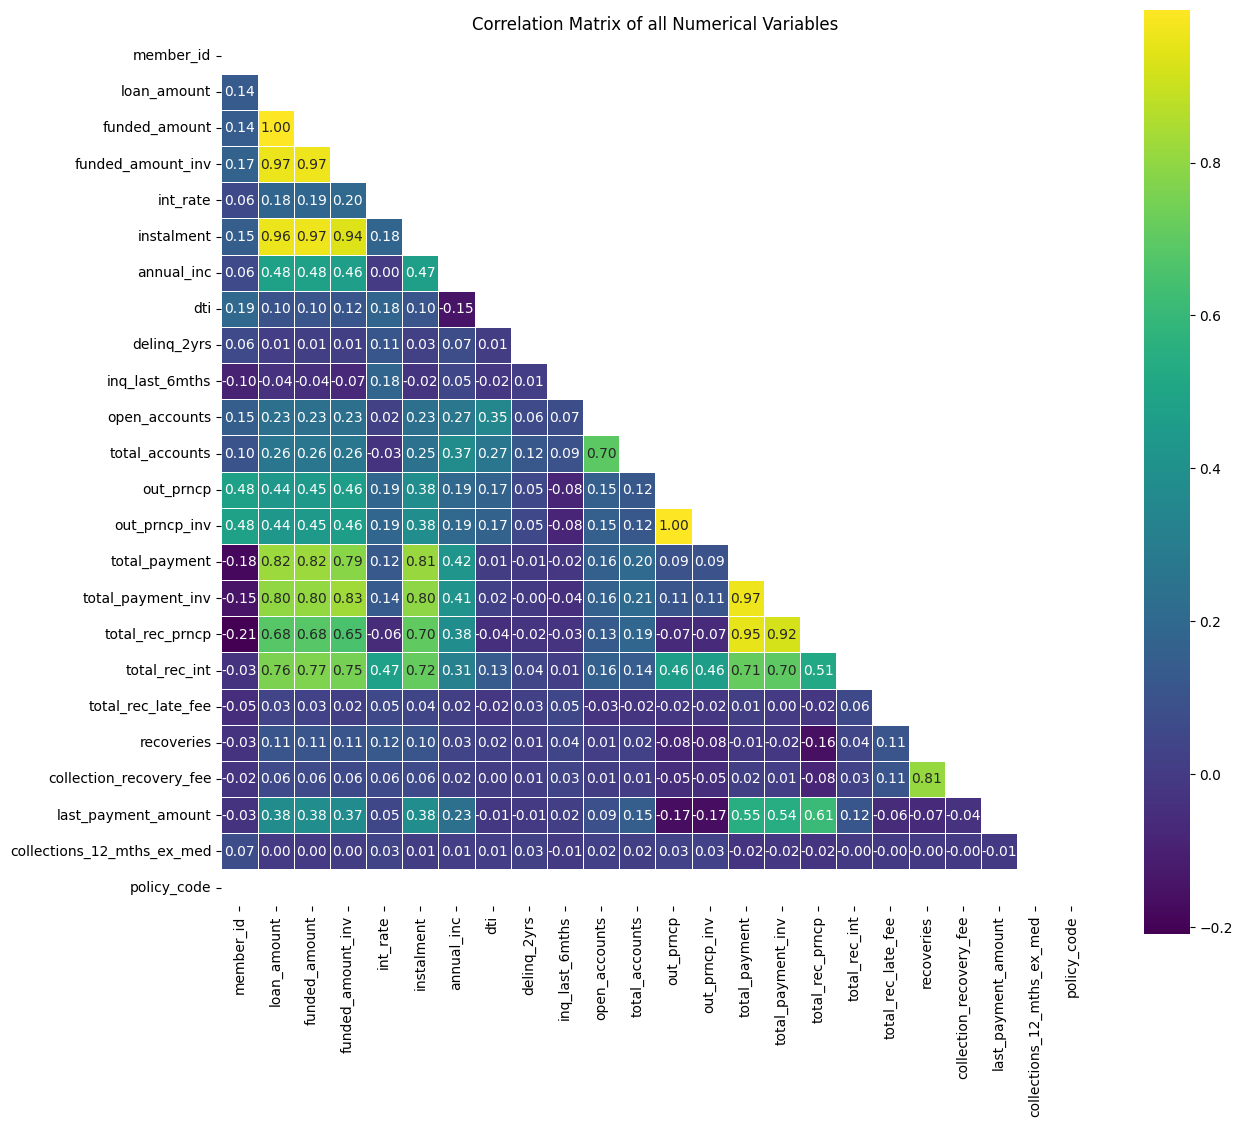

In [23]:
plotter.correlation_matrix(df[numeric_columns])

a conservative threshold of 0.85 correlation is being used to identify which columns will be removed. The following columns are quite correlated:
- '*funded_amount*' and '*loan_amount*': **1.00**
- '*out_prncp_inv*' and '*out_prncp*: **1.00**
- '*funded_amount_inv*' and '*funded_amount*': **0.97**
- '*funded_amount_inv*' and '*loan_amount*': **0.97**
- '*total_payment_inv*' and '*total_payment*': **0.97**
- '*instalment*' and '*funded_amount*': **0.97**
- '*instalment*' and '*loan_amount*': **0.96**
- '*total_rec_prncp*' and '*total_payment*;': **0.95**
- '*instalment*' and '*funded_amount_inv*': **0.94**
- '*total_rec_prncp*' and '*total_payment_inv*': **0.92**

From the correlated pairs it can be identified where there is collinearity and multi-linearity, suggesting which columns would be removed:
- There is  multi-linearity between '*loan_amount*', '*instalment*', '*funded_amount*' and '*funded_amount_inv*'.
- There is  multi-linearity between '*total_payment_inv*', '*total_payment*' and '*total_rec_prncp*'.
- There is collinearity between '*out_prncp_inv*' and '*out_prncp*'.

However all these variables are required for the analysis stage so for now none of these columns will be removed.

In [24]:
# Saving a copy of the df in loan_payments_versions folder
with open('loan_payments_versions/loan_payments_transformed.csv', 'w') as file:
    df.to_csv(file, encoding= 'utf-8')

The transformation to the dataframe has been complete. The 'analysis_and_visualisation.ipynb' contains the further analysis to this data.